# S03 T01 Visualització gràfica d'un dataset

### Exercici 1

Resum gràfic de la pràctica 5

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import timedelta


import warnings
warnings.simplefilter(action='ignore')

df = pd.read_csv('./dataset/DelayedFlights.csv', delimiter=",", decimal=".", encoding ='unicode_escape')
df.head(3)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [8]:
print(df.columns)
print('\nEl dataset té: %d entrades i %d columnes. ' % df.shape)

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'ArrTime',
       'UniqueCarrier', 'FlightNum', 'ActualElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'Cancelled',
       'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

El dataset té: 1936758 entrades i 23 columnes. 


In [7]:
# Llistem les variables que conté el dataset

df_variables  = pd.read_excel(io = './dataset/variable_descriptions_excel.xlsx')
print(df_variables)

                 Name                                        Description
0                Year                                          1987-2008
1               Month                                             12-Jan
2          DayofMonth                                             31-Jan
3           DayOfWeek                            1 (Monday) - 7 (Sunday)
4             DepTime                actual departure time (local, hhmm)
5          CRSDepTime             scheduled departure time (local, hhmm)
6             ArrTime                  actual arrival time (local, hhmm)
7          CRSArrTime               scheduled arrival time (local, hhmm)
8       UniqueCarrier                                unique carrier code
9           FlightNum                                      flight number
10            TailNum                                  plane tail number
11  ActualElapsedTime                                         in minutes
12     CRSElapsedTime                              

In [2]:
carrier = pd.read_csv('./dataset/carriers.csv', delimiter=",", decimal=".", encoding ='unicode_escape')
carrier.head(3)

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"


In [4]:
carrier_columns = list(carrier.columns)
carrier2_columns = ['COD_OP', 'AEROLINIA']

zip_columns = dict(zip(carrier_columns, carrier2_columns))
carrier.rename(columns = zip_columns, inplace=True)
print(carrier.head(3))

  COD_OP            AEROLINIA
0    02Q        Titan Airways
1    04Q   Tradewind Aviation
2    05Q  Comlux Aviation, AG


In [5]:
# Esborrem les columnes que considerem menys rellevants per analisis estadístic
df.drop(['Unnamed: 0', 'CRSDepTime', 'CRSArrTime', 'CRSElapsedTime', 'TailNum', 'TaxiIn', 'TaxiOut'], axis = 1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   ArrTime            float64
 6   UniqueCarrier      object 
 7   FlightNum          int64  
 8   ActualElapsedTime  float64
 9   AirTime            float64
 10  ArrDelay           float64
 11  DepDelay           float64
 12  Origin             object 
 13  Dest               object 
 14  Distance           int64  
 15  Cancelled          int64  
 16  CancellationCode   object 
 17  Diverted           int64  
 18  CarrierDelay       float64
 19  WeatherDelay       float64
 20  NASDelay           float64
 21  SecurityDelay      float64
 22  LateAircraftDelay  float64
dtypes: float64(11), int64(8), object(4)
memory usage: 339.9+ MB
None


In [6]:
df[df.select_dtypes(np.float64).columns] = df.select_dtypes(np.float64).astype(np.float32)
df[df.select_dtypes(np.int64).columns] = df.select_dtypes(np.int64).astype(np.int32)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int32  
 1   Month              int32  
 2   DayofMonth         int32  
 3   DayOfWeek          int32  
 4   DepTime            float32
 5   ArrTime            float32
 6   UniqueCarrier      object 
 7   FlightNum          int32  
 8   ActualElapsedTime  float32
 9   AirTime            float32
 10  ArrDelay           float32
 11  DepDelay           float32
 12  Origin             object 
 13  Dest               object 
 14  Distance           int32  
 15  Cancelled          int32  
 16  CancellationCode   object 
 17  Diverted           int32  
 18  CarrierDelay       float32
 19  WeatherDelay       float32
 20  NASDelay           float32
 21  SecurityDelay      float32
 22  LateAircraftDelay  float32
dtypes: float32(11), int32(8), object(4)
memory usage: 199.5+ MB


In [7]:
print('Número de entrades duplicades\n', df.duplicated().sum() )
print('Número de valors nuls:\n', df.isna().sum())

Número de entrades duplicades
 2
Número de valors nuls:
 Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
ArrTime                7110
UniqueCarrier             0
FlightNum                 0
ActualElapsedTime      8387
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64


In [8]:
# Eliminem les files duplicades i les files que tinguin nulls en totes les columnes
df.drop_duplicates().reset_index(drop=True)
df.dropna(how='all', axis = 1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,AirTime,...,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,2211.0,WN,335,128.0,116.0,...,TPA,810,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,1002.0,WN,3231,128.0,113.0,...,TPA,810,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,804.0,WN,448,96.0,76.0,...,BWI,515,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1959.0,WN,3920,90.0,77.0,...,BWI,515,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,2121.0,WN,378,101.0,87.0,...,JAX,688,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1617.0,DL,1621,147.0,120.0,...,ATL,906,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,657.0,904.0,DL,1631,127.0,78.0,...,ATL,481,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,1007.0,1149.0,DL,1631,162.0,122.0,...,IAH,689,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,6,1251.0,1446.0,DL,1639,115.0,89.0,...,ATL,533,0,N,0,NaN,NaN,NaN,NaN,NaN


In [9]:
df1_columns = list(df.columns)

df2_columns = ['ANY', 'MES', 'DIA', 'SETMANA', 'HR_SORTIDA', 'HR_ARRIBADA', 'COD_OP','NUM_VOL', 'DURACIO', 'TEMPS_VOL', 
               'RET_ARRIBADA', 'RET_SORTIDA', 'COD_ORIGEN', 'COD_DESTI', 'DISTANCIA', 'CANCELAT', 'COD_CANCEL',
               'DESVIAT', 'RET_OP', 'RET_CLIMA', 'RET_CNATU', 'RET_SEG', 'RET_AVIO']

zip_columns = dict(zip(df1_columns, df2_columns))
df.rename(columns = zip_columns, inplace=True)
print(df.head(3))

    ANY  MES  DIA  SETMANA  HR_SORTIDA  HR_ARRIBADA COD_OP  NUM_VOL  DURACIO  \
0  2008    1    3        4      2003.0       2211.0     WN      335    128.0   
1  2008    1    3        4       754.0       1002.0     WN     3231    128.0   
2  2008    1    3        4       628.0        804.0     WN      448     96.0   

   TEMPS_VOL  ...  COD_DESTI  DISTANCIA CANCELAT COD_CANCEL  DESVIAT  RET_OP  \
0      116.0  ...        TPA        810        0          N        0     NaN   
1      113.0  ...        TPA        810        0          N        0     NaN   
2       76.0  ...        BWI        515        0          N        0     NaN   

  RET_CLIMA  RET_CNATU  RET_SEG  RET_AVIO  
0       NaN        NaN      NaN       NaN  
1       NaN        NaN      NaN       NaN  
2       NaN        NaN      NaN       NaN  

[3 rows x 23 columns]


In [10]:
df_merged = pd.merge(df, carrier, how='left')
df_merged = df_merged[['ANY', 'MES', 'DIA', 'SETMANA', 'HR_SORTIDA', 'HR_ARRIBADA', 'COD_OP', 'AEROLINIA', 'NUM_VOL', 'DURACIO', 'TEMPS_VOL', 
               'RET_ARRIBADA', 'RET_SORTIDA', 'COD_ORIGEN', 'COD_DESTI', 'DISTANCIA', 'CANCELAT', 'COD_CANCEL',
               'DESVIAT', 'RET_OP', 'RET_CLIMA', 'RET_CNATU', 'RET_SEG', 'RET_AVIO']]

print(df_merged.head(3))

    ANY  MES  DIA  SETMANA  HR_SORTIDA  HR_ARRIBADA COD_OP  \
0  2008    1    3        4      2003.0       2211.0     WN   
1  2008    1    3        4       754.0       1002.0     WN   
2  2008    1    3        4       628.0        804.0     WN   

                AEROLINIA  NUM_VOL  DURACIO  ...  COD_DESTI  DISTANCIA  \
0  Southwest Airlines Co.      335    128.0  ...        TPA        810   
1  Southwest Airlines Co.     3231    128.0  ...        TPA        810   
2  Southwest Airlines Co.      448     96.0  ...        BWI        515   

   CANCELAT COD_CANCEL DESVIAT  RET_OP  RET_CLIMA RET_CNATU  RET_SEG  RET_AVIO  
0         0          N       0     NaN        NaN       NaN      NaN       NaN  
1         0          N       0     NaN        NaN       NaN      NaN       NaN  
2         0          N       0     NaN        NaN       NaN      NaN       NaN  

[3 rows x 24 columns]


In [11]:
airport = pd.read_csv('./dataset/airports.csv', delimiter=",", decimal=".", encoding ='unicode_escape', index_col=0)
airport.head(3)

,airport,city,state,country,lat,long
iata,,,,,,
00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893


In [12]:
airport.drop(['state', 'country'], axis = 1, inplace=True)

In [13]:
airport.head(3)

,airport,city,lat,long
iata,,,,
00M,Thigpen,Bay Springs,31.953765,-89.234505
00R,Livingston Municipal,Livingston,30.685861,-95.017928
00V,Meadow Lake,Colorado Springs,38.945749,-104.569893


In [14]:
rename = {'airport': 'AEROPORT', 'city': 'CIUTAT', 'long':'lon'}
airport.rename(columns=rename, inplace=True)
airport.columns

Index(['AEROPORT', 'CIUTAT', 'lat', 'lon'], dtype='object')

In [15]:
aero_origi = df_merged['COD_ORIGEN'].map(airport['AEROPORT'])
aero_desti = df_merged['COD_DESTI'].map(airport['AEROPORT'])

city_origi = df_merged['CIUTAT_ORIGEN'] = df_merged['COD_ORIGEN'].map(airport['CIUTAT'])
city_desti = df_merged['CIUTAT_DESTI'] = df_merged['COD_DESTI'].map(airport['CIUTAT'])

df_merged.drop(columns=["COD_ORIGEN", "COD_DESTI"], inplace=True)

df_merged['AERO_ORIGEN'] = aero_origi
df_merged['AERO_DESTI'] = aero_desti

df_merged['CIUTAT_ORIGEN'] = city_origi
df_merged['CIUTAT_DESTI'] = city_desti

df_merged.head(3)

,ANY,MES,DIA,SETMANA,HR_SORTIDA,HR_ARRIBADA,COD_OP,AEROLINIA,NUM_VOL,DURACIO,...,DESVIAT,RET_OP,RET_CLIMA,RET_CNATU,RET_SEG,RET_AVIO,CIUTAT_ORIGEN,CIUTAT_DESTI,AERO_ORIGEN,AERO_DESTI
0,2008,1,3,4,2003.0,2211.0,WN,Southwest Airlines Co.,335,128.0,...,0,NaN,NaN,NaN,NaN,NaN,Chantilly,Tampa,Washington Dulles International,Tampa International
1,2008,1,3,4,754.0,1002.0,WN,Southwest Airlines Co.,3231,128.0,...,0,NaN,NaN,NaN,NaN,NaN,Chantilly,Tampa,Washington Dulles International,Tampa International
2,2008,1,3,4,628.0,804.0,WN,Southwest Airlines Co.,448,96.0,...,0,NaN,NaN,NaN,NaN,NaN,Indianapolis,Baltimore,Indianapolis International,Baltimore-Washington International


In [16]:
rename = {'AEROPORT': 'AERO_ORIGEN', 'lat': 'lat_ORIG', 'lon':'lon_ORIG' }
airport.rename(columns=rename, inplace=True)
airport.drop(columns=['CIUTAT'], inplace=True)
airport.columns

Index(['AERO_ORIGEN', 'lat_ORIG', 'lon_ORIG'], dtype='object')

In [17]:
df_merged = pd.merge(df_merged, airport, on = 'AERO_ORIGEN', how = 'left')

In [19]:
df_merged.columns

Index(['ANY', 'MES', 'DIA', 'SETMANA', 'HR_SORTIDA', 'HR_ARRIBADA', 'COD_OP',
       'AEROLINIA', 'NUM_VOL', 'DURACIO', 'TEMPS_VOL', 'RET_ARRIBADA',
       'RET_SORTIDA', 'DISTANCIA', 'CANCELAT', 'COD_CANCEL', 'DESVIAT',
       'RET_OP', 'RET_CLIMA', 'RET_CNATU', 'RET_SEG', 'RET_AVIO',
       'CIUTAT_ORIGEN', 'CIUTAT_DESTI', 'AERO_ORIGEN', 'AERO_DESTI',
       'lat_ORIG', 'lon_ORIG'],
      dtype='object')

In [18]:
rename = {'AERO_ORIGEN':'AERO_DESTI', 'lat_ORIG':'lat_DESTI', 'lon_ORIG':'lon_DESTI' }
airport.rename(columns=rename, inplace=True)
airport.columns

Index(['AERO_DESTI', 'lat_DESTI', 'lon_DESTI'], dtype='object')

In [19]:
df_merged = pd.merge(df_merged, airport, on = 'AERO_DESTI', how = 'left')

In [22]:
df_merged.columns


Index(['ANY', 'MES', 'DIA', 'SETMANA', 'HR_SORTIDA', 'HR_ARRIBADA', 'COD_OP',
       'AEROLINIA', 'NUM_VOL', 'DURACIO', 'TEMPS_VOL', 'RET_ARRIBADA',
       'RET_SORTIDA', 'DISTANCIA', 'CANCELAT', 'COD_CANCEL', 'DESVIAT',
       'RET_OP', 'RET_CLIMA', 'RET_CNATU', 'RET_SEG', 'RET_AVIO',
       'CIUTAT_ORIGEN', 'CIUTAT_DESTI', 'AERO_ORIGEN', 'AERO_DESTI',
       'lat_ORIG', 'lon_ORIG', 'lat_DESTI', 'lon_DESTI'],
      dtype='object')

In [20]:
new_df = df_merged.filter(['AERO_ORIGEN', 'AERO_DESTI', 'lat_ORIG', 'lon_ORIG', 'lat_DESTI', 'lon_DESTI'])
print(new_df.head(5))

                       AERO_ORIGEN                          AERO_DESTI  \
0  Washington Dulles International                Tampa International    
1  Washington Dulles International                Tampa International    
2       Indianapolis International  Baltimore-Washington International   
3       Indianapolis International  Baltimore-Washington International   
4       Indianapolis International          Jacksonville International   

    lat_ORIG   lon_ORIG  lat_DESTI  lon_DESTI  
0  38.944532 -77.455810  27.975472 -82.533250  
1  38.944532 -77.455810  27.975472 -82.533250  
2  39.717329 -86.294384  39.175402 -76.668198  
3  39.717329 -86.294384  39.175402 -76.668198  
4  39.717329 -86.294384  30.494056 -81.687861  


In [28]:
!pip install geoplotlib

In [104]:
!pip install Pyglet

In [26]:
#Grafiquem els vols en un Spatial Graph

import geoplotlib 
from geoplotlib.layers import BaseLayer
import pyglet

geoplotlib.graph(new_df,
                 src_lat='lat_ORIG',
                 src_lon='lon_ORIG',
                 dest_lat='lat_DESTI',
                 dest_lon='lon_DESTI',
                 color='hot_r',
                 alpha=16,
                 linewidth=2)

#geoplotlib.savefig('mapa-vols.png')
geoplotlib.show()

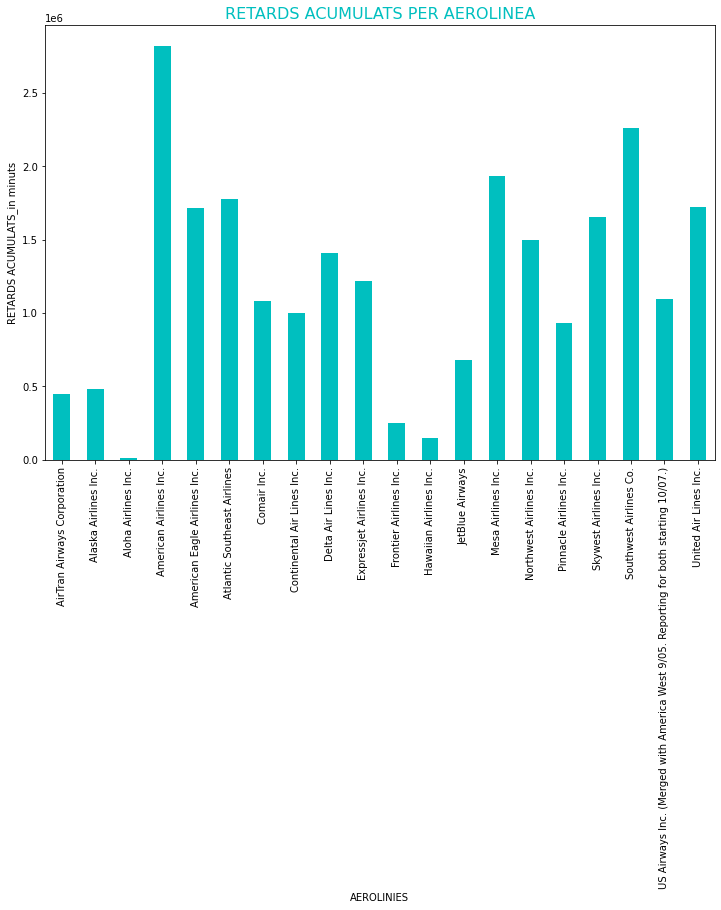

In [37]:
# Gràfica de les aerolínies amb més endarreriments acumulats

retard_aero = df_merged.groupby('AEROLINIA')['RET_OP'].sum()

title = 'RETARDS ACUMULATS PER AEROLINEA'
plt.figure(figsize=(12,8))
retard_aero.plot.bar(color='c')
plt.title(title, fontsize= 16, color='c', ha='center', pad=40)
plt.xlabel('AEROLINIES')
plt.ylabel('RETARDS ACUMULATS_in minuts')
plt.show()

# Guardem la gràfique en format imatge
# plt.savefig('variable-categorica-UniqueCarrier.png', dpi=300, bbox_inches='tight')
saveImage(plt, title)

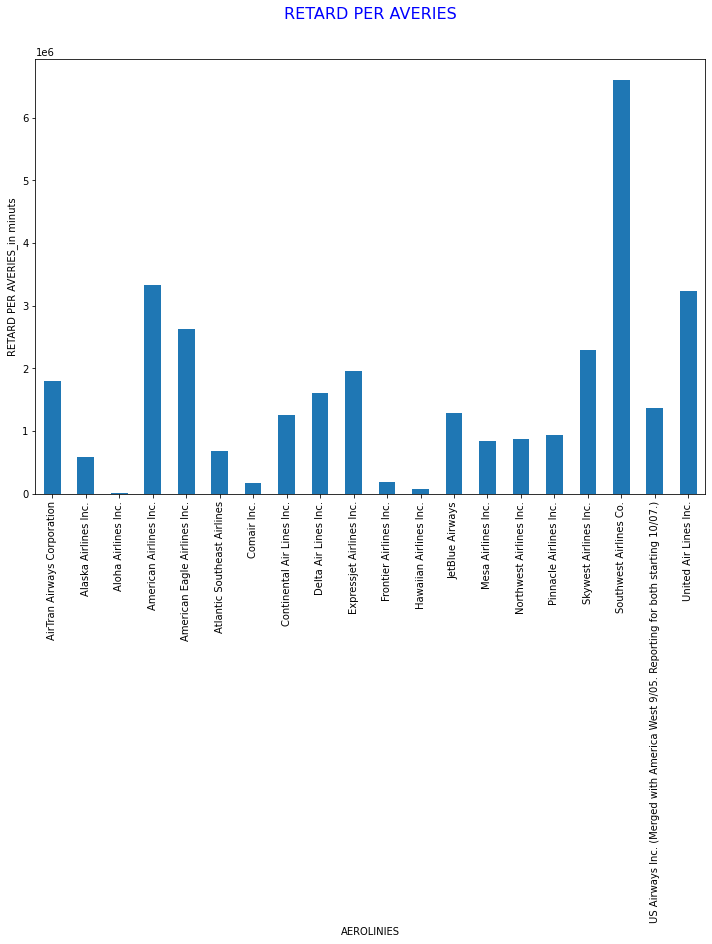

In [86]:
# Les earolinees que ténen més retards degut a averíes tècniques de l'avió
df_grouped = df_merged.groupby('AEROLINIA')['RET_AVIO'].sum()

title = 'RETARD PER AVERIES'
plt.figure(figsize=(12, 8))
plt.title(title,fontsize= 16, color='b', ha='center', pad=40)
df_grouped.plot.bar()
plt.xlabel('AEROLINIES')
plt.ylabel('RETARD PER AVERIES_in minuts');
saveImage(plt, title)

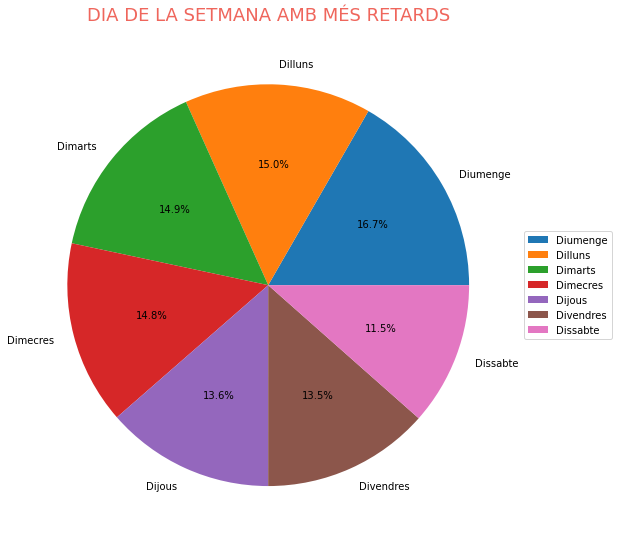

In [44]:
# Ara necessitem saber el día de la setmana en el qua hi ha més retards
dia_unic = df_merged['SETMANA'].unique()

dia_dict = {1:"Diumenge", 2:"Dilluns", 3:"Dimarts", 4:"Dimecres", 5:"Dijous", 6:"Divendres", 7:"Dissabte"}

df_merged['DIA_SETMANA'] = df_merged['SETMANA']
df_merged['DIA_SETMANA'] = df_merged['DIA_SETMANA'].map(dia_dict)
df_merged['DIA_SETMANA'].value_counts(sort=True)


df_sem = df_merged['DIA_SETMANA'].value_counts(sort=True)
plt.figure(figsize =(9, 9))
labels = ["Diumenge", "Dilluns", "Dimarts", "Dimecres", "Dijous", "Divendres", "Dissabte"]
title='DIA DE LA SETMANA AMB MÉS RETARDS'
plt.title(title,fontsize= 18, color='#eb4034',  alpha=0.8,  ha='center', pad=20)
plt.axis("equal")
plt.pie(df_sem, labels=labels, autopct='%1.1f%%')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
saveImage(plt, title)

In [137]:
# % de vols desviats:

df_desviats =  df_merged[['DESVIAT']]
p_dict = {0:"No Desviats", 1:"Desviats"}
df_desviats = df_desviats['DESVIAT'].map(p_dict)
deviats_count = df_desviats.value_counts()
print(deviats_count)

desviats_norm = df_desviats.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(desviats_norm)


No Desviats    1940259
Desviats          7779
Name: DESVIAT, dtype: int64
No Desviats    99.6%
Desviats        0.4%
Name: DESVIAT, dtype: object


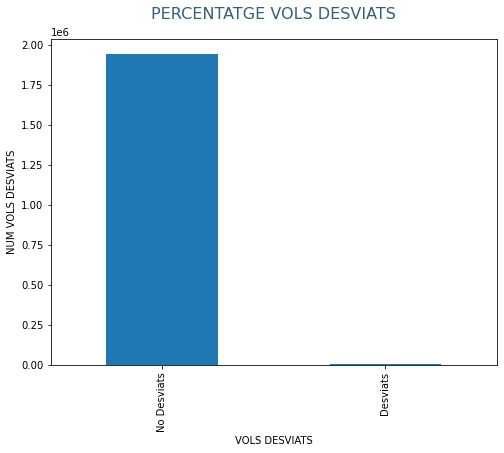

In [145]:
# Grafiquem: 

title = 'PERCENTATGE VOLS DESVIATS'
fig = plt.figure(figsize=(8, 6))
plt.title(title,fontsize= 16, color='#355e78', ha='center', pad=20)
df_desviats.value_counts().plot(kind = 'bar')
plt.xlabel('VOLS DESVIATS')
plt.ylabel('NUM VOLS DESVIATS')
plt.show()
saveImage(plt, title)

In [141]:
# % de vols cancelats:

df_cancel =  df_merged[['CANCELAT']]

c_dict = {0:"No Cancelats", 1:"Cancelats"}
df_cancel = df_cancel['CANCELAT'].map(c_dict)                                                   
cancel_count = df_cancel.value_counts()
print(cancel_count)

cancel_norm = df_cancel.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
print(cancel_norm)


No Cancelats    1947400
Cancelats           638
Name: CANCELAT, dtype: int64
No Cancelats    99.97%
Cancelats        0.03%
Name: CANCELAT, dtype: object


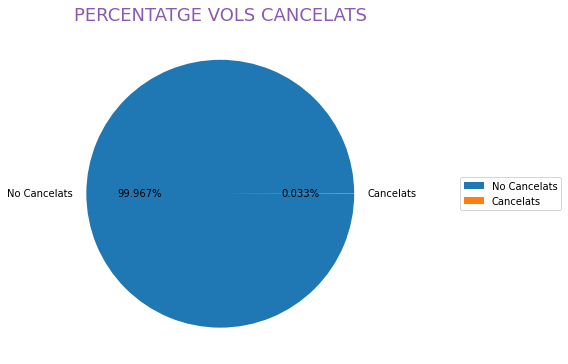

In [151]:
# Grafiquem: 

title = 'PERCENTATGE VOLS CANCELATS'
plt.figure(figsize =(6, 6))
plt.title(title, fontsize= 18, color='#6a339e',  alpha=0.8,  ha='center', pad=10)
labels = ["No Cancelats", "Cancelats"]
plt.axis("equal")
plt.pie(cancel_count, labels=labels, autopct='%1.3f%%')
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()
saveImage(plt, title)

In [24]:
# Unim les aerolinees i els vols més llargs

df_max = df_merged[['NUM_VOL', 'AEROLINIA', 'DISTANCIA']].sort_values(by='DISTANCIA', ascending=False)
df_max

,NUM_VOL,AEROLINIA,DISTANCIA
365661,15,Continental Air Lines Inc.,4962
1075242,15,Continental Air Lines Inc.,4962
1938096,14,Continental Air Lines Inc.,4962
1529315,14,Continental Air Lines Inc.,4962
880862,15,Continental Air Lines Inc.,4962
...,...,...,...
1464622,6898,Comair Inc.,30
525546,2009,Pinnacle Airlines Inc.,24
47272,5610,Comair Inc.,24
779396,4988,Comair Inc.,11


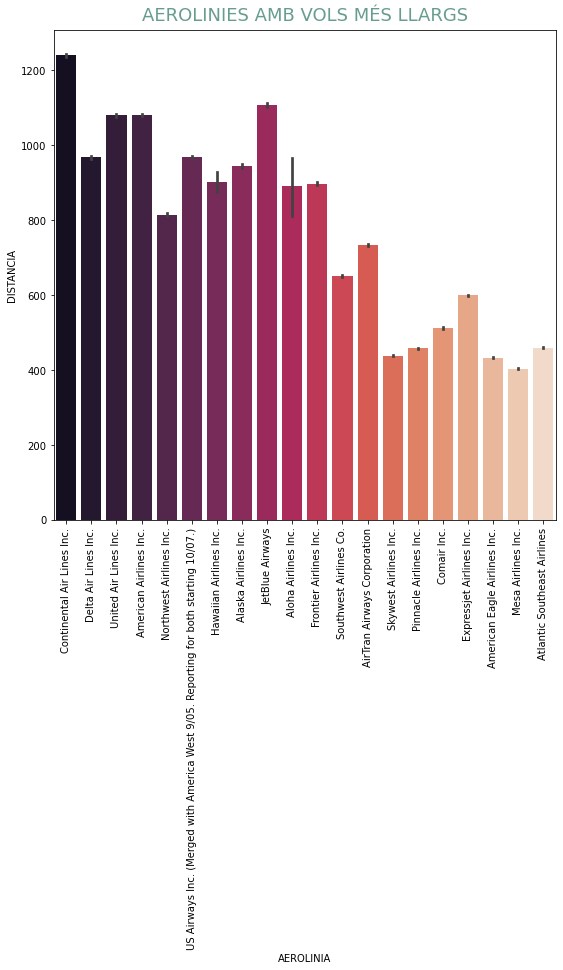

In [159]:
# Grafiquem

title = 'AEROLINIES AMB VOLS MÉS LLARGS'
plt.figure(figsize =(9, 9))
axis = sns.barplot(x='AEROLINIA', y='DISTANCIA', data=df_max, palette='rocket' )
plt.title(title, fontsize=18, color='#428574', alpha=0.8, ha='center', pad=10)
plt.xticks(rotation=90)

plt.ylabel('DISTANCIA')
plt.xlabel('AEROLINIA')
plt.show()
saveImage(plt, title)

### Exercici 2

Resumeix gràficament el data set [DelayedFlights.csv]('https://www.kaggle.com/datasets/giovamata/airlinedelaycauses')

Crea almenys una visualització per:

- Una variable categòrica (UniqueCarrier)
- Una variable numèrica (ArrDelay)
- Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
- Dues variables numèriques (ArrDelay i DepDelay)
- Tres variables (ArrDelay, DepDelay i UniqueCarrier)
- Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier)

### Visualització de la variable categòrica (UniqueCarrier)

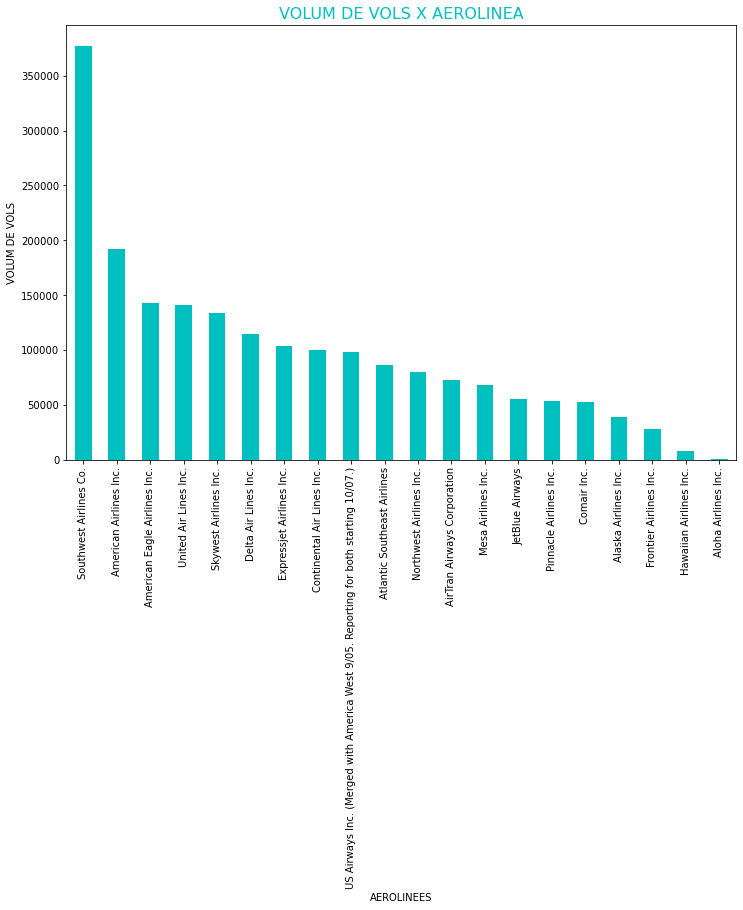

<Figure size 432x288 with 0 Axes>

In [31]:
aero_ret = df_merged['AEROLINIA'].value_counts()
title = 'VOLUM DE VOLS X AEROLINEA'
plt.figure(figsize=(12,8))
aero_ret.plot.bar(x = 'AEROLINIA', y = 'VOLUM_VOLS', color = 'c')
plt.title(title, fontsize= 16, color='c', ha='center')
plt.xlabel('AEROLINEES')
plt.ylabel('VOLUM DE VOLS')
plt.show()

# Guardem la gràfique en format imatge
plt.savefig('volum-vols.png', dpi=300, bbox_inches='tight')
#saveImage(plt, title)

### Visualització de la variable numèrica (ArrDelay)

In [32]:
    
df_merged['RET_ARRIVAL'] = df_merged['RET_ARRIBADA']
xmin, xmax = df_merged.RET_ARRIVAL.min(), df_merged.RET_ARRIVAL.max()

In [33]:
ret_arr_list = df_merged['RET_ARRIVAL'].value_counts()
ret_arr_dict = dict(zip(ret_arr_list.index, ret_arr_list))

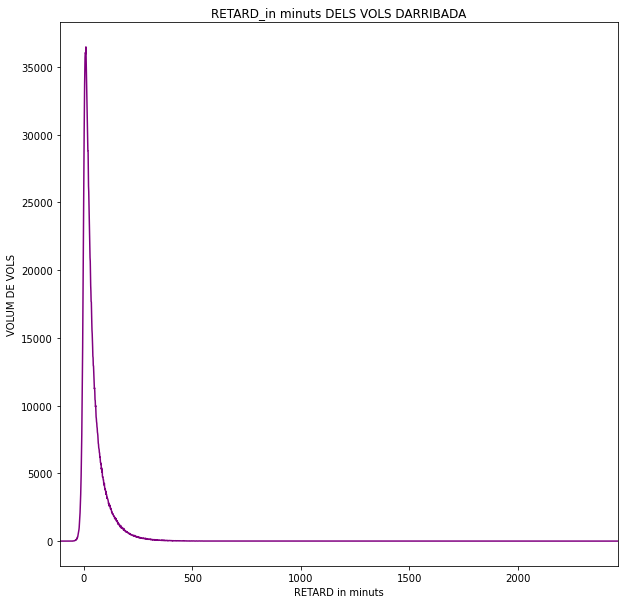

<Figure size 432x288 with 0 Axes>

In [34]:
fig = plt.figure(figsize =(10,10))

x = sorted(ret_arr_list.index)
y= [ret_arr_dict.get(i) for i in x]

title = 'RETARD_in minuts DELS VOLS DARRIBADA'
sns.lineplot(x=x, y=y, color = 'purple').set(title=title)
plt.xlim(xmin, xmax)
plt.xlabel('RETARD in minuts', size = 10)
plt.ylabel('VOLUM DE VOLS', size = 10)
plt.show()

# Guardem la gràfique en format imatge
plt.savefig('retard-vols-arribada.png', dpi=300, bbox_inches='tight')
#saveImage(plt, title)

### Visualització d'una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)

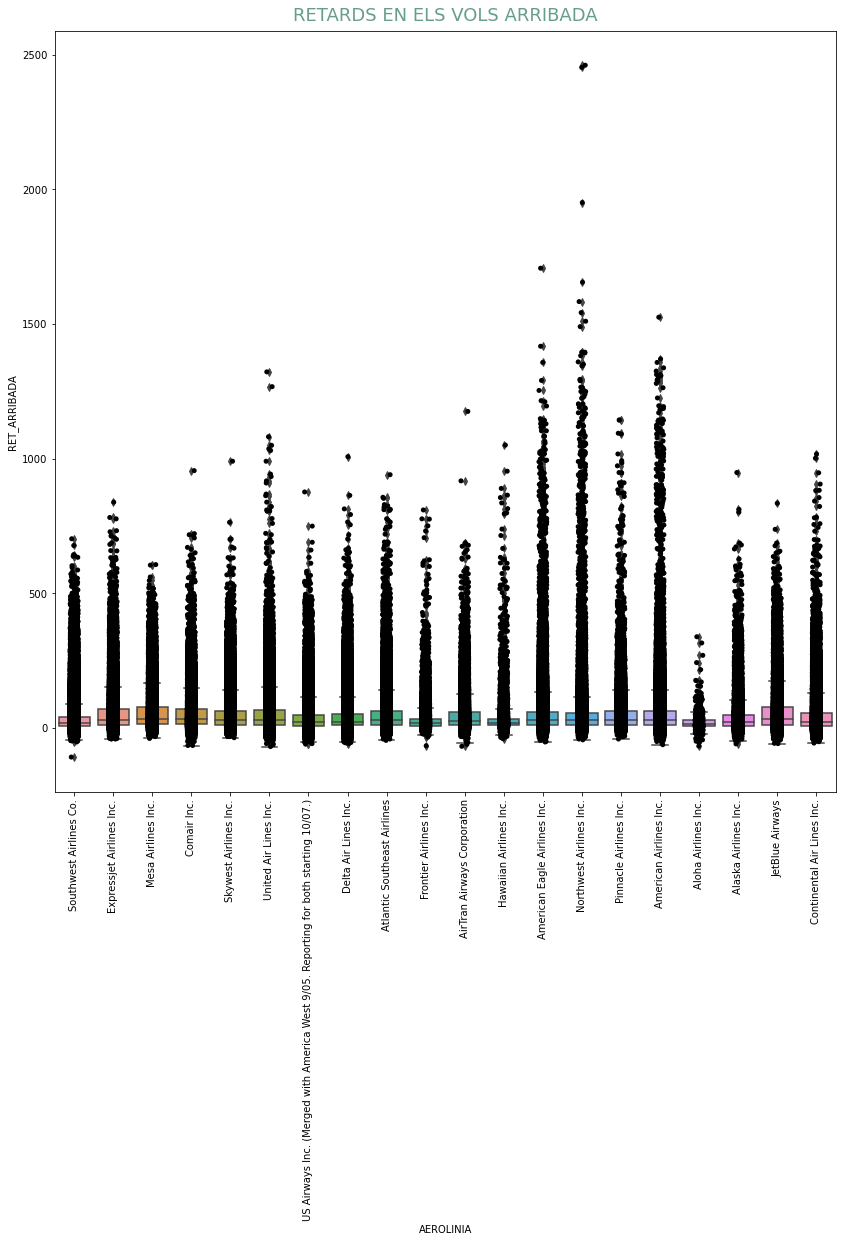

<Figure size 432x288 with 0 Axes>

In [35]:
data2 = df_merged[["AEROLINIA", "RET_ARRIBADA"]]

plt.figure(figsize =(14,14))
title = "RETARDS EN ELS VOLS ARRIBADA"
sns.stripplot(x="AEROLINIA", y="RET_ARRIBADA", data=data2, color="black")
sns.boxplot(x="AEROLINIA", y="RET_ARRIBADA", data=data2).set_title(title, fontsize=18, color='#428574', alpha=0.8, ha='center', pad=10)

plt.xticks(rotation=90)
plt.show()

# Guardem la gràfique en format imatge
plt.savefig('retard-vols-arribada-aerolinia.png', dpi=300, bbox_inches='tight')
#saveImage(plt, title)

### Visualització de les variables numèriques (ArrDelay i DepDelay)

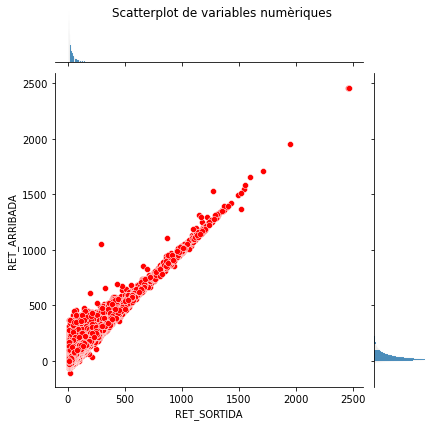

<Figure size 432x288 with 0 Axes>

In [36]:
data3 = df_merged[['RET_SORTIDA', 'RET_ARRIBADA']]
p = sns.jointplot(data=data3, x="RET_SORTIDA", y="RET_ARRIBADA", joint_kws={'color': 'red'})
p.fig.suptitle("Scatterplot de variables numèriques");
plt.show()

# Guardem la gràfique en format imatge 
plt.savefig('relacio-variables-numeriques.png')
#saveImage(plt, title)

### Visualització de les variables (ArrDelay, DepDelay i UniqueCarrier)

<Figure size 1008x1008 with 0 Axes>

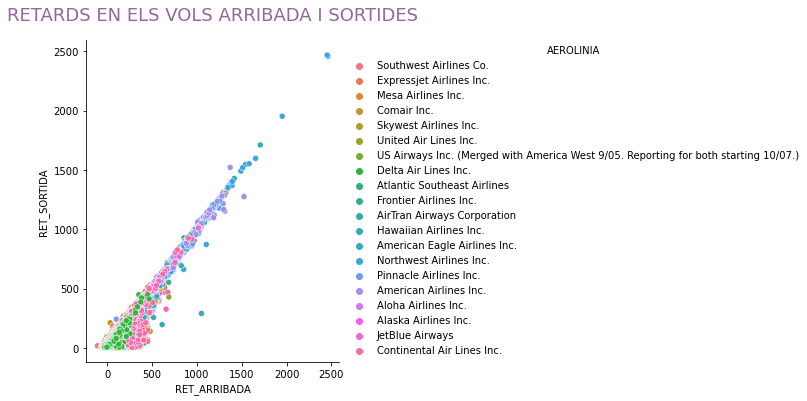

<Figure size 432x288 with 0 Axes>

In [40]:
data1 = df_merged[["AEROLINIA", "RET_ARRIBADA", "RET_SORTIDA"]]

plt.figure(figsize=(14,14))
title = "RETARDS EN ELS VOLS ARRIBADA I SORTIDES"
sns.relplot(data=data1, x="RET_ARRIBADA", y="RET_SORTIDA", hue="AEROLINIA")
plt.title(title, fontsize=18, color='#7a4182', alpha=0.8, pad=20)
plt.show()

# Guardem la gràfique en format imatge 
plt.savefig('retards-vols-arribada-sortida-aerolinia.png', dpi=300, bbox_inches='tight')
#saveImage(plt, title)

### Visualització de les variables (ArrDelay, DepDelay, AirTime i UniqueCarrier)

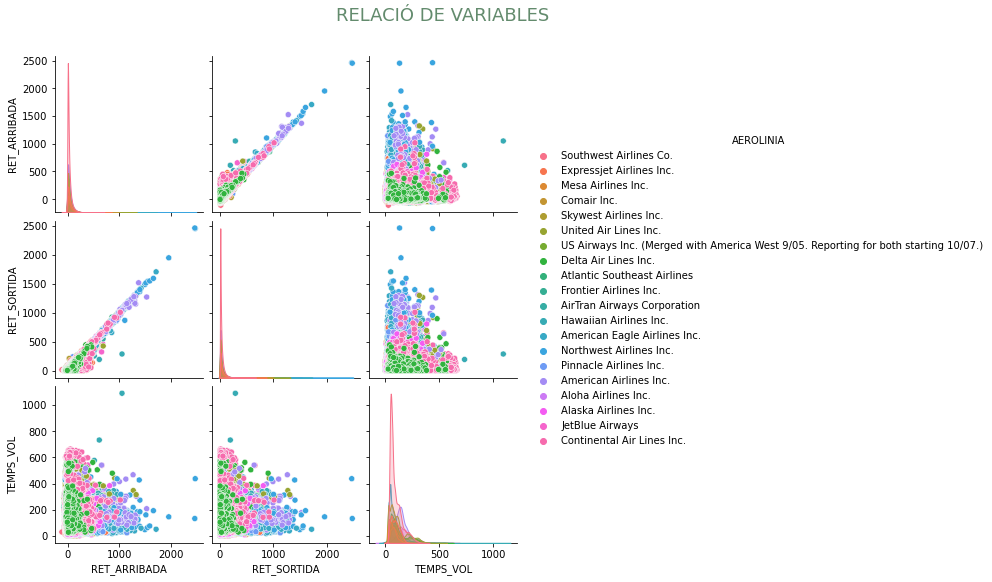

<Figure size 432x288 with 0 Axes>

In [23]:
data5 = df_merged[["AEROLINIA", "RET_ARRIBADA", "RET_SORTIDA", "TEMPS_VOL"]]

title = "RELACIÓ DE VARIABLES"
sns.pairplot(data5, hue ="AEROLINIA" )
plt.title(title, fontsize=18, color='#3c6e49', alpha=0.8, ha='center', pad=200)
plt.show()

# Guardem la gràfique en format imatge i mostrem per pantalla
plt.savefig('relacio-variables.png', dpi=300, bbox_inches='tight')
#saveImage(plt, title)

### Exercici 3

Exportar els gràfics en format imatges o html

In [ ]:
# Alternativa per guardar el grafic en format imatge

path_grafics = "image/fig"
num_img = 1

def saveImage(plt, title):
    global num_img
    num_image +=1
    fig = path_grafics + str(num_img)
    plt.savefig(fig, transparent=True, dpi=150, bbox_inches='tight', pad_inches=1)
    